# <span style='color:red'> #KeepItOn </span> 📡 Data Analysis

 __The Context:__
<br>Access Now is a growing international human rights organization dedicated to defending and extending the digital rights of users at risk around the world. This task falls within the #KeepItOn campaign, a global initiative to end internet shutdowns through advocacy, documentation and monitoring, direct policy-maker engagement, strategic litigation among others.

__About the Project:__
<br>The aim of this project is to analyse a database consisting on internet access shut downs around the world, The aim of this project is to answer the questions from the case study proposed besides doing a Exploratory Data Analysis.

__The tasks for analysis:__
- Task 1: In bullet sentences tell some differences of shutdown cases between India and Belarus. (Consider: Who ordered the shutdowns? What are the unique traits of these shutdowns? What communities are impacted? How are they impacted?)
- Task 2: There is a tweet report that a mobile network shutdown is ongoing in Niger right after its 2021 residential election. How would you proceed to verify this claim? (Please list any kind of evidence you think would be key to verify this shutdown and a plan to get them.)

# Data Preprocessing

## Import necessary libraries

In [1]:
!pip install tabulate

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Explore data

In [4]:
df = pd.read_csv('KeepItOn-STOP-Data-2020.csv', header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                155 non-null    int64  
 1   start_date                        155 non-null    object 
 2   end_date                          155 non-null    object 
 3   duration                          126 non-null    float64
 4   Info_source                       154 non-null    object 
 5   news_link                         153 non-null    object 
 6   continent                         155 non-null    object 
 7   country                           155 non-null    object 
 8   State/India                       96 non-null     object 
 9   geo_scope                         155 non-null    object 
 10  area_name                         145 non-null    object 
 11  ordered_by                        155 non-null    object 
 12  decision

In [5]:
df.head(10)

,ID,start_date,end_date,duration,Info_source,news_link,continent,country,State/India,geo_scope,area_name,ordered_by,decision_maker,shutdown_type_new,affected_network,full or service-based,Facebook_affected,Twitter_affected,WhatsApp_affected,Instagram_affected,Telegram_affected,other_service_details (specify),SMS_affected,phone_call_affected,telcos_involved,gov_ack,official_just,other_just_details,off_statement,actual_cause,other_cause_details,election,violence,hr_abuse_reported,users_notified,users_affected/targetted,legal_justif,legal_method,telco_resp,telco_ ack,econ_impact,event,an_link,notes
0,1,6/12/2016,Ongoing,NaN,News media article,https://slate.com/technology/2017/08/the-inter...,Asia,Pakistan,NaN,Level 2,Federally Administered Tribal Area,Executive government,NaN,Shutdown,"Broadband, Mobile",Full network,No,No,No,No,No,NaN,Unknown,Unknown,NaN,Yes,Technical problems/ Infrastructure failure,Government said they will not be able to resto...,NaN,Other,Conflict between Afghanistan and Pakistan forces,No,No,No,No,NaN,No,NaN,NaN,Unknown,NaN,NaN,NaN,NaN
1,2,6/22/2019,Ongoing,NaN,News media article,https://www.aljazeera.com/news/2020/6/21/inter...,Asia,Myanmar,NaN,Level 2,"Myabon, Ponnagyun, Kyauktaw, and Mrauk U Towns...",Executive government,Myanmar Ministry of Transport and Communicatio...,Throttle,Mobile,Full network,No,No,No,No,No,NaN,No,No,NaN,Yes,Fake news/ Hate speech/ Incendiary content/ Pr...,"Act of Terrorism, acts of disturbance, and ill...",NaN,Political instability,NaN,Yes,Yes,Unknown,No,Ethnic minorities,Yes,"Acts of terrorism, act of disturbance, and ill...",https://www.telenor.com/internet-services-rest...,Yes,NaN,NaN,NaN,NaN
2,3,8/3/2019,1/25/2020,175.0,NaN,https://www.news18.com/news/india/omar-abdulla...,Asia,India,Jammu and Kashmir,Level 2,Kashmir Valley,State government,State government,Shutdown,"Broadband, Mobile",Full network,No,No,No,No,No,NaN,Yes,Yes,India: BSNL,Yes,Fake news/ Hate speech/ Incendiary content/ Pr...,NaN,https://twitter.com/NetShutdowns/status/121715...,Political instability,NaN,No,Yes,Yes,No,"Ethnic minorities, Religious minorities",Yes,Section 144 CrPC,NaN,Unknown,NaN,NaN,NaN,NaN
3,4,9/9/2019,8/28/2020,354.0,News media article,https://www.hrw.org/news/2019/09/13/bangladesh...,Asia,Bangladesh,NaN,Level 1,Refugee Camps in Cox Bazar district and penins...,Executive government,Bangladesh Telecommunication Regulatory Commis...,Throttle,Mobile,Full network,No,No,No,No,No,NaN,No,No,Bangladesh: banglalink (Global Telecom),Yes,Fake news/ Hate speech/ Incendiary content/ Pr...,"To stop baseless rumours and misinformation"" c...",NaN,Protests,Protests organized by refugees commemorating t...,No,No,No,No,Ethnic minorities,Yes,NaN,NaN,No,NaN,NaN,NaN,NaN
4,5,1/1/2020,1/1/2020,0.0,News media article,"""https://timesofindia.indiatimes.com/city/pune...",Asia,India,Maharashtra,Level 2,"Koregaon Bhima, Perne village in Pune district",Local government,Pune superintendent of police (rural) Sandeep ...,Shutdown,"Broadband, Mobile",Full network,No,No,No,No,No,NaN,Unknown,Unknown,NaN,Yes,Precautionary measure,NaN,https://timesofindia.indiatimes.com/city/pune/...,Religious holiday/anniversary,202nd Anniversary of Battle of Koregaon Bhima:,No,No,No,No,NaN,No,No,NaN,Unknown,NaN,NaN,NaN,NaN
5,6,1/1/2020,1/5/2020,4.0,News media article,https://indianexpress.com/article/cities/kolka...,Asia,India,West Bengal,Level 2,"Duttapukur, Amdanga and Deganga, in North 24 P...",Local government,NaN,Shutdown,Unknown,Full network,No,No,No,No,No,NaN,No,No,NaN,Yes,Public safety/ Quell unrest / Restore public o...,"""PROHIBITORY ORDERS were imposed in three panc...",NaN,Communal violence,"""clashes between members of two communities in...",No,Yes,Yes,No,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,NaN
6,7,1/3/2020,4/1/2020,89.0,News media article,https://www.hrw.org/news/2020/03/09/ethiopia-c...,Africa,Ethiopia,NaN,Level 2,"Kellem Wollega, West Wollega, Horo Gudru Wolle...",State government,NaN,Shutdown,"Broadband, Mobile","Full netw

## Duplicates

In [6]:
# check for duplicates
df.duplicated().any()

False

## Missing values

In [7]:
# check for missing values
df.isna().sum().sum()

1570

In [8]:
# replace missing values for <NA>
df = df.applymap(lambda x: pd.NA if pd.isnull(x) else x)

## Clean data

In [9]:
# strip whitespace and lowercase all
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [10]:
# make ID column the index
if 'ID' in df.columns:
    df.set_index('ID', inplace=True)

In [11]:
# strip whitespace, replace spaces with underscores and lowercase column names for readability in columns
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [12]:
# drop columns with 0 non-null values
df = df.dropna(axis=1, how='all')

In [13]:
# replace categorical values with numerical values
df.replace({'yes': 1, 'no': 0, 'unknown': pd.NA}, inplace=True)

# columns where the replacement happened
categorical_cols = ['facebook_affected', 'twitter_affected', 'whatsapp_affected', 'instagram_affected', 'telegram_affected',
                   'sms_affected' , 'phone_call_affected' , 'gov_ack', 'election' , 'violence' , 'hr_abuse_reported' ,
                    'users_notified' , 'legal_justif']

# fix datatype
for col in categorical_cols:
    df[col] = df[col].astype('Int64')

## Fix data types

In [14]:
# to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [15]:
# to numeric for days and accepting NaN
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').astype('Int64')

In [16]:
# to string
to_string = df.select_dtypes(include=['object']).columns.tolist()

for col in to_string:
    df[col] = df[col].astype("string")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 155
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   start_date                       155 non-null    datetime64[ns]
 1   end_date                         135 non-null    datetime64[ns]
 2   duration                         126 non-null    Int64         
 3   info_source                      154 non-null    string        
 4   news_link                        153 non-null    string        
 5   continent                        155 non-null    string        
 6   country                          155 non-null    string        
 7   state/india                      96 non-null     string        
 8   geo_scope                        155 non-null    string        
 9   area_name                        145 non-null    string        
 10  ordered_by                       136 non-null    string       

## Duration Column

In [18]:
# check if duration column is correct
df['calculated_duration'] = (df['end_date'] - df['start_date']).dt.days
df[['start_date', 'end_date', 'duration', 'calculated_duration']]

,start_date,end_date,duration,calculated_duration
ID,,,,
1,2016-06-12,NaT,<NA>,NaN
2,2019-06-22,NaT,<NA>,NaN
3,2019-08-03,2020-01-25,175,175.0
4,2019-09-09,2020-08-28,354,354.0
5,2020-01-01,2020-01-01,0,0.0
6,2020-01-01,2020-01-05,4,4.0
7,2020-01-03,2020-04-01,89,89.0
8,2020-01-04,NaT,<NA>,NaN
9,2020-01-05,2020-01-05,0,0.0


In [19]:
# substitute duration column for teh correct calculated duration
df['duration'] = df['calculated_duration'].astype('Int64')

In [20]:
# drop extra calculated duration column
df.drop(columns=['calculated_duration'], inplace=True)

## Check data

In [21]:
# investigate columns for cleanliness
cols = ['info_source', 'continent', 'country', 'state/india', 'geo_scope', 'ordered_by', 'shutdown_type_new', 'affected_network',
 'full_or_service-based', 'official_just', 'actual_cause', 'users_affected/targetted']

for i in cols:
    unique_values = df[i].unique()
    print(f"{i}: {unique_values}\n")

info_source: <StringArray>
['news media article',                 <NA>,              'other',
       'social media',   'cso kio partners',       'confidential']
Length: 6, dtype: string

continent: <StringArray>
['asia', 'africa', 'latin america', 'middle east', 'europe']
Length: 5, dtype: string

country: <StringArray>
[                          'pakistan',                            'myanmar',
                              'india',                         'bangladesh',
                           'ethiopia', 'venezuela (bolivarian republic of)',
                               'togo',                              'yemen',
         'iran (islamic republic of)',                           'viet nam',
                             'turkey',                              'kenya',
                             'guinea',                              'sudan',
                            'burundi',                            'ecuador',
                            'belarus',                        

In [22]:
df.head()

,start_date,end_date,duration,info_source,news_link,continent,country,state/india,geo_scope,area_name,ordered_by,decision_maker,shutdown_type_new,affected_network,full_or_service-based,facebook_affected,twitter_affected,whatsapp_affected,instagram_affected,telegram_affected,other_service_details_(specify),sms_affected,phone_call_affected,telcos_involved,gov_ack,official_just,other_just_details,off_statement,actual_cause,other_cause_details,election,violence,hr_abuse_reported,users_notified,users_affected/targetted,legal_justif,legal_method,telco_resp,telco__ack
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016-06-12,NaT,<NA>,news media article,https://slate.com/technology/2017/08/the-inter...,asia,pakistan,<NA>,level 2,federally administered tribal area,executive government,<NA>,shutdown,"broadband, mobile",full network,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,1,technical problems/ infrastructure failure,government said they will not be able to resto...,<NA>,other,conflict between afghanistan and pakistan forces,0,0,0,0,<NA>,0,<NA>,<NA>,<NA>
2,2019-06-22,NaT,<NA>,news media article,https://www.aljazeera.com/news/2020/6/21/inter...,asia,myanmar,<NA>,level 2,"myabon, ponnagyun, kyauktaw, and mrauk u towns...",executive government,myanmar ministry of transport and communicatio...,throttle,mobile,full network,0,0,0,0,0,<NA>,0,0,<NA>,1,fake news/ hate speech/ incendiary content/ pr...,"act of terrorism, acts of disturbance, and ill...",<NA>,political instability,<NA>,1,1,<NA>,0,ethnic minorities,1,"acts of terrorism, act of disturbance, and ill...",https://www.telenor.com/internet-services-rest...,1
3,2019-08-03,2020-01-25,175,<NA>,https://www.news18.com/news/india/omar-abdulla...,asia,india,jammu and kashmir,level 2,kashmir valley,state government,state government,shutdown,"broadband, mobile",full network,0,0,0,0,0,<NA>,1,1,india: bsnl,1,fake news/ hate speech/ incendiary content/ pr...,<NA>,https://twitter.com/netshutdowns/status/121715...,political instability,<NA>,0,1,1,0,"ethnic minorities, religious minorities",1,section 144 crpc,<NA>,<NA>
4,2019-09-09,2020-08-28,354,news media article,https://www.hrw.org/news/2019/09/13/bangladesh...,asia,bangladesh,<NA>,level 1,refugee camps in cox bazar district and penins...,executive government,bangladesh telecommunication regulatory commis...,throttle,mobile,full network,0,0,0,0,0,<NA>,0,0,bangladesh: banglalink (global telecom),1,fake news/ hate speech/ incendiary content/ pr...,"to stop baseless rumours and misinformation"" c...",<NA>,protests,protests organized by refugees commemorating t...,0,0,0,0,ethnic minorities,1,<NA>,<NA>,0
5,2020-01-01,2020-01-01,0,news media article,"""https://timesofindia.indiatimes.com/city/pune...",asia,india,maharashtra,level 2,"koregaon bhima, perne village in pune district",local government,pune superintendent of police (rural) sandeep ...,shutdown,"broadband, mobile",full network,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,1,precautionary measure,<NA>,https://timesofindia.indiatimes.com/city/pune/...,religious holiday/anniversary,202nd anniversary of battle of koregaon bhima:,0,0,0,0,<NA>,0,0,<NA>,<NA>


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 155
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   start_date                       155 non-null    datetime64[ns]
 1   end_date                         135 non-null    datetime64[ns]
 2   duration                         135 non-null    Int64         
 3   info_source                      154 non-null    string        
 4   news_link                        153 non-null    string        
 5   continent                        155 non-null    string        
 6   country                          155 non-null    string        
 7   state/india                      96 non-null     string        
 8   geo_scope                        155 non-null    string        
 9   area_name                        145 non-null    string        
 10  ordered_by                       136 non-null    string       

## Exporting the cleaned data

In [24]:
df.to_csv('KeepItOn_Clean.csv', index=False)

# EDA

## Duration of Shutdowns in Days

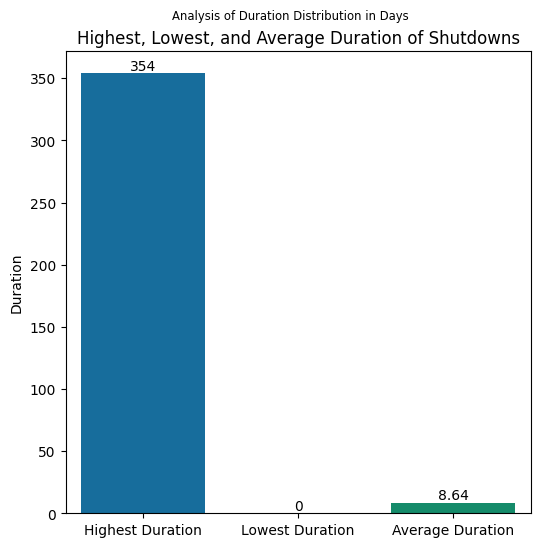

In [25]:
avg_duration = df['duration'].mean()

idx_highest_duration = df['duration'].idxmax()
idx_lowest_duration = df['duration'].idxmin()

highest_duration = df.loc[idx_highest_duration, 'duration']
lowest_duration = df.loc[idx_lowest_duration, 'duration']

plt.figure(figsize=(6, 6))
sns.set_palette('colorblind')
sns.barplot(x=['Highest Duration', 'Lowest Duration', 'Average Duration'], y=[highest_duration, lowest_duration, avg_duration])
plt.ylabel('Duration')
plt.title('Highest, Lowest, and Average Duration of Shutdowns')
plt.suptitle('Analysis of Duration Distribution in Days', x=0.5, y=0.95, ha='center', fontsize='small', fontweight='normal')

for i, v in enumerate([highest_duration, lowest_duration, avg_duration]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

plt.savefig('total_duration.png')
plt.show()

## Main Information Source

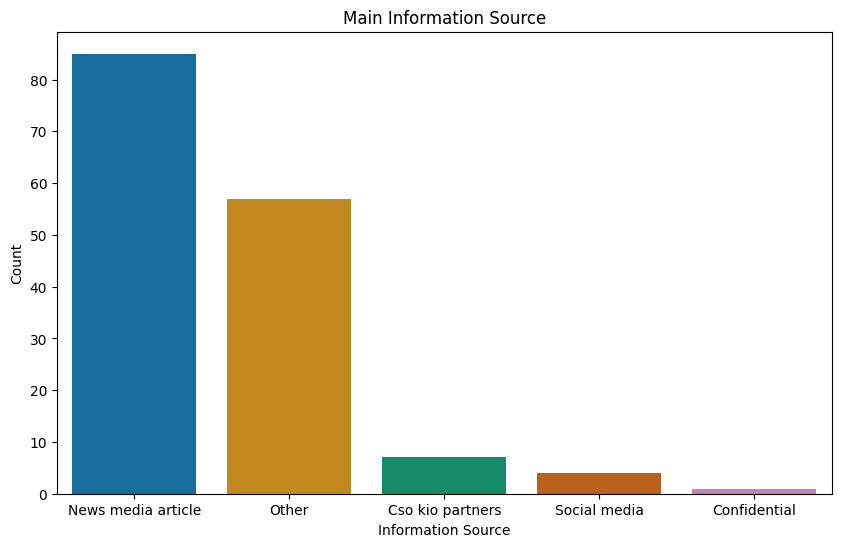

In [26]:
info_source_count = df['info_source'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
sns.barplot(x=info_source_count.index, y=info_source_count.values)
plt.xlabel('Information Source')
plt.ylabel('Count')
plt.title('Main Information Source')
plt.gca().set_xticklabels([label.capitalize() for label in info_source_count.index])

plt.savefig('main_info_source.png')
plt.show()

## Geo Scope and Duration

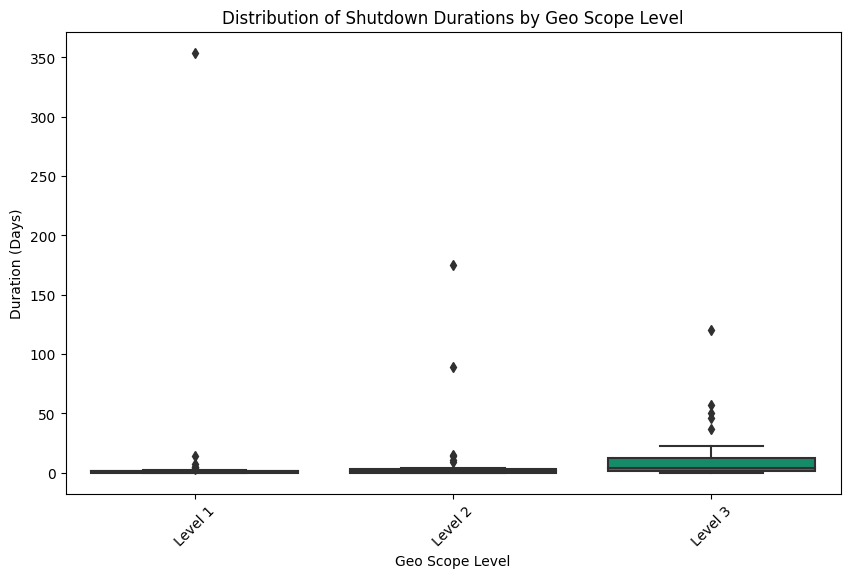

In [27]:
unique_geo_scopes = sorted(df['geo_scope'].unique())

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
sns.boxplot(data=df, x='geo_scope', y='duration', order=unique_geo_scopes)
plt.xlabel('Geo Scope Level')
plt.ylabel('Duration (Days)')
plt.title('Distribution of Shutdown Durations by Geo Scope Level')
plt.gca().set_xticklabels([label.capitalize() for label in unique_geo_scopes])
plt.xticks(rotation=45)

plt.savefig('geo_scope_duration.png')
plt.show()

## Shutdowns by Continent and by Country

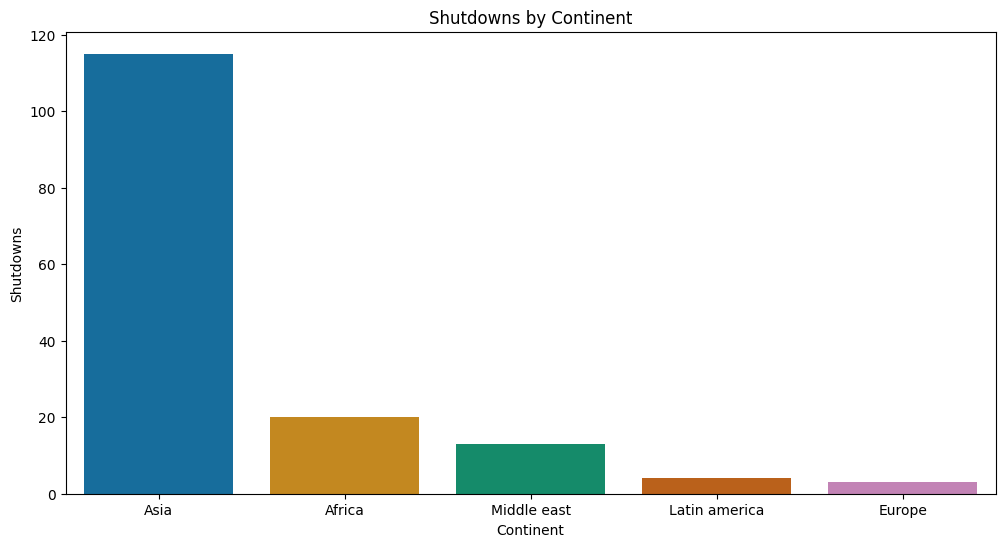

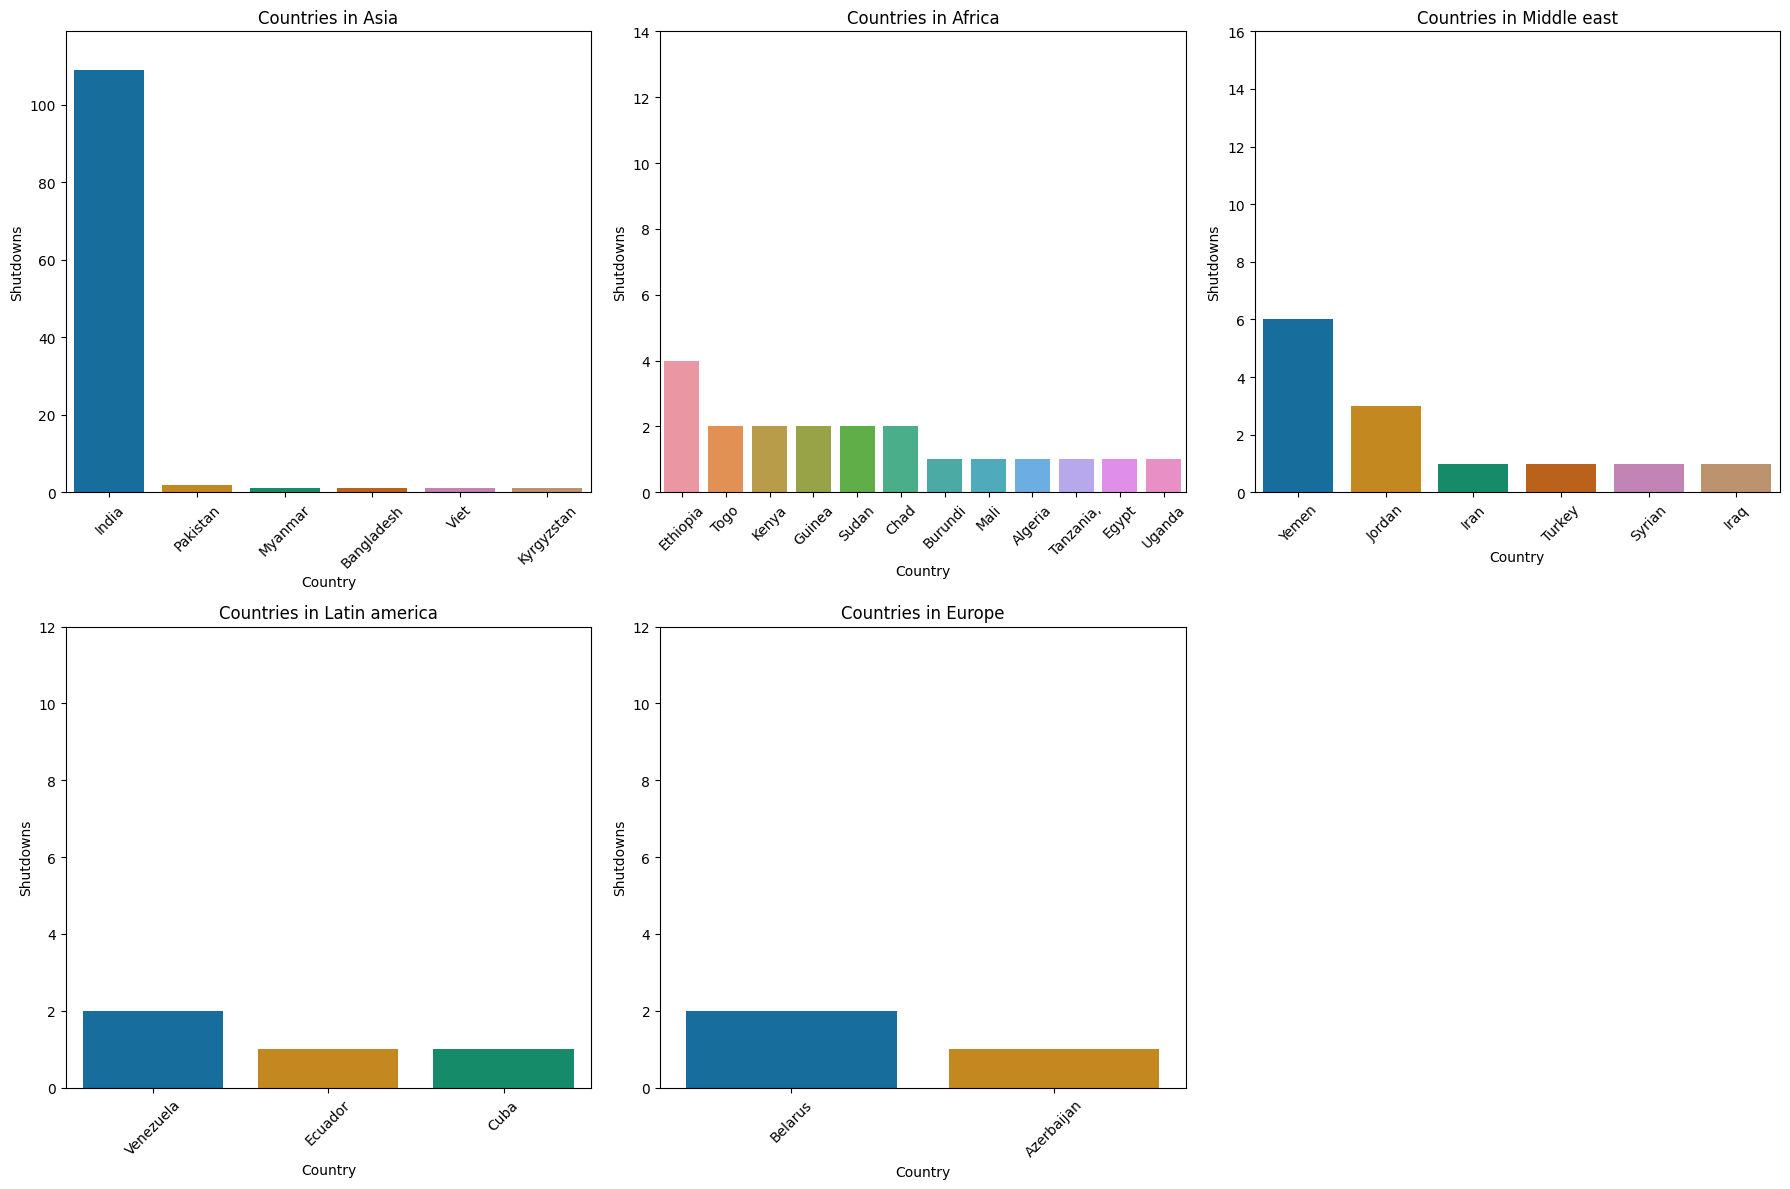

In [28]:
continent_counts = df['continent'].value_counts()

plt.figure(figsize=(12, 6))
sns.set_palette('colorblind')
continent_counts_plot = sns.barplot(x=continent_counts.index.str.capitalize(), y=continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Shutdowns')
plt.title('Shutdowns by Continent')

for bar in continent_counts_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '', ha='center', va='bottom')

plt.xticks(ticks=range(len(continent_counts.index)), labels=continent_counts.index.str.capitalize())
plt.savefig('continents.png')


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, (continent, ax) in enumerate(zip(continent_counts.index, axes)):
    countries_counts = df[df['continent'] == continent]['country'].value_counts()
    if len(countries_counts) > 0:  # check if there is data for the continent
        countries_plot = sns.barplot(x=countries_counts.index, y=countries_counts.values, ax=ax)
        ax.set_title(f'Countries in {continent.capitalize()}')
        ax.set_xlabel('Country')
        ax.set_ylabel('Shutdowns')
        ax.set_xticklabels([country.split()[0].capitalize() for country in countries_counts.index], rotation=45)
        ax.set_ylim(0, countries_counts.max() + 10)  # set ylim to ensure bars don't get clipped
    else:
        fig.delaxes(ax)  # delete the subplot if there is no data

for ax in axes[len(continent_counts.index):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig('country.png')
plt.show()

## Shutdown Orderer

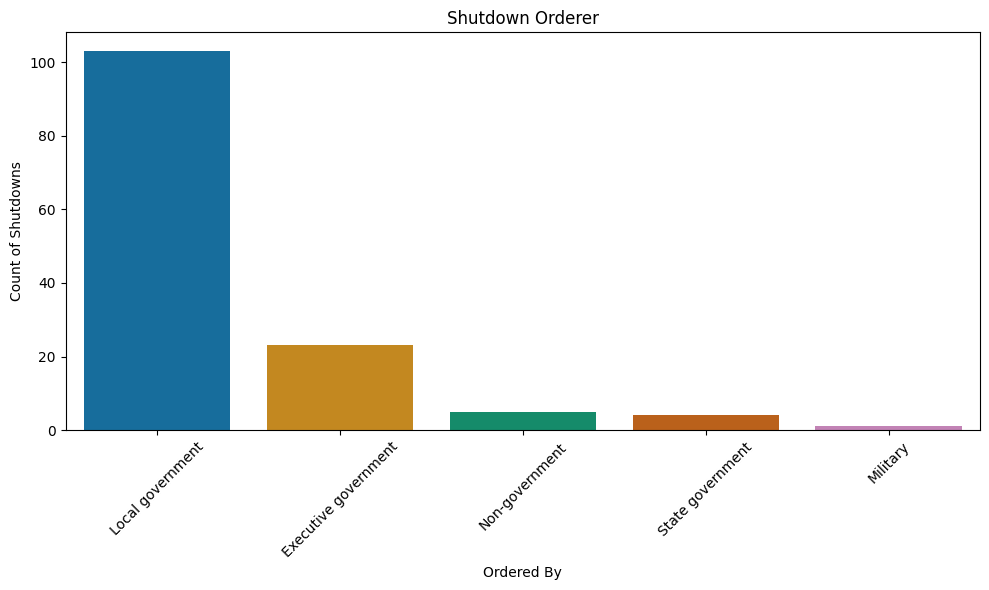

In [29]:
ordered_by_counts = df['ordered_by'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
sns.barplot(x=ordered_by_counts.index, y=ordered_by_counts.values)
plt.xlabel('Ordered By')
plt.ylabel('Count of Shutdowns')
plt.title('Shutdown Orderer')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([label.get_text().capitalize() for label in plt.gca().get_xticklabels()])

plt.tight_layout()
plt.savefig('orderer.png')
plt.show()

## Shutdowns Distributions and Services Affected

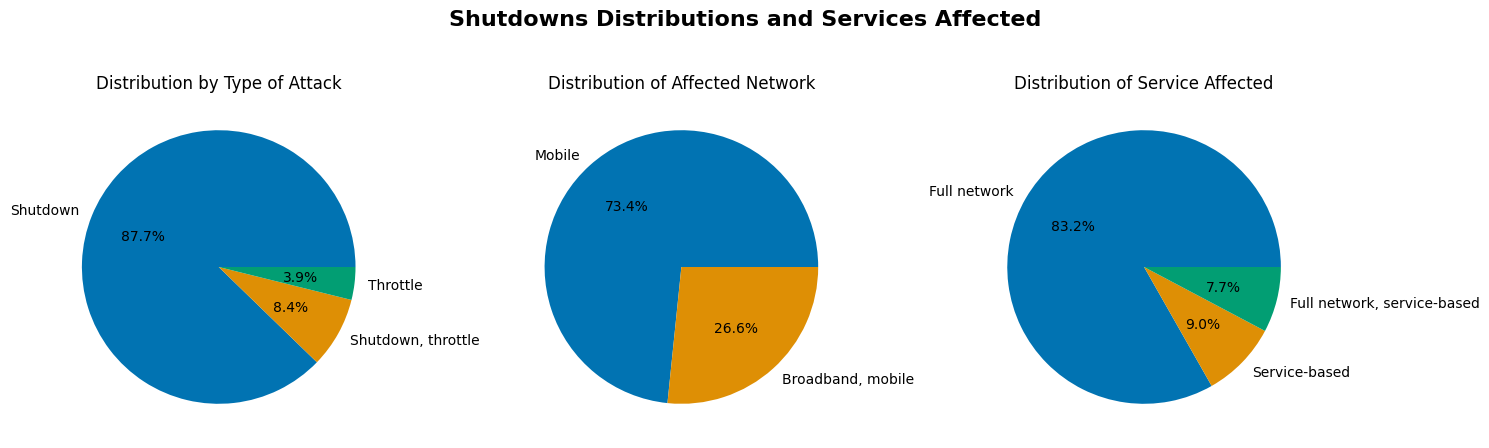

In [30]:
def my_autopct(pct):
    return '{:.1f}%'.format(pct)

titles = ['Distribution by Type of Attack', 'Distribution of Affected Network', 'Distribution of Service Affected']
columns = ['shutdown_type_new', 'affected_network', 'full_or_service-based']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_palette('colorblind')
for ax, column, title in zip(axes.flatten(), columns, titles):
    data_counts = df[column].value_counts()
    ax.pie(data_counts, labels=[str(label).capitalize() for label in data_counts.index], autopct=my_autopct, startangle=0, textprops={'color': 'black'})
    ax.set_title(title)
fig.suptitle('Shutdowns Distributions and Services Affected', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('distribution_services.png')
plt.show()

## Correlation of Social Media and Telecommunication Affected

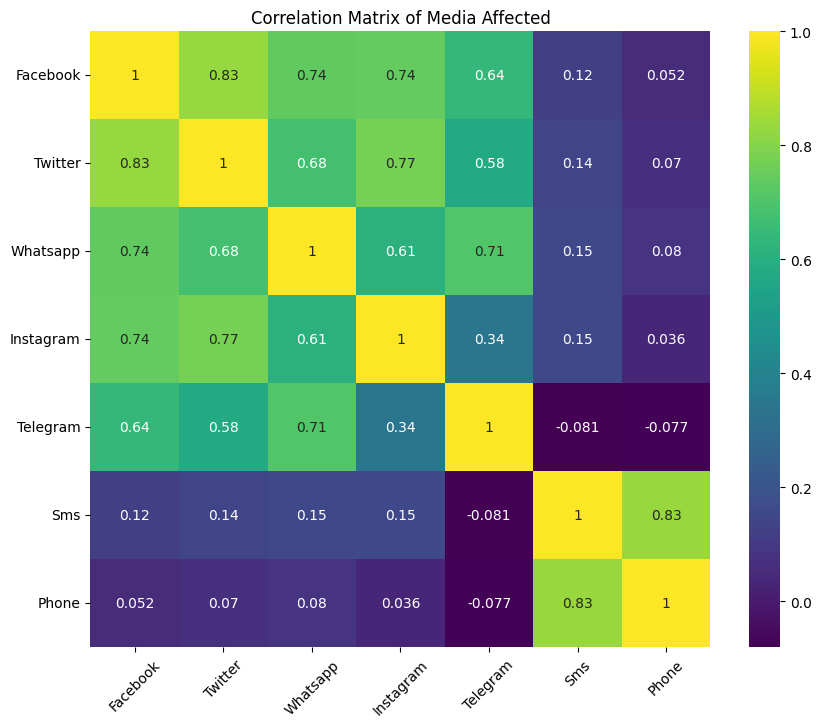

In [31]:
media_matrix = df[['facebook_affected', 'twitter_affected', 'whatsapp_affected', 'instagram_affected', 
                   'telegram_affected', 'sms_affected', 'phone_call_affected']].corr()
column_names = [col.split('_')[0].capitalize() for col in media_matrix.columns]

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(media_matrix, annot=True, cmap='viridis')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Matrix of Media Affected')

plt.savefig('corr_social_telecom.png')
plt.show()

## Official Justification

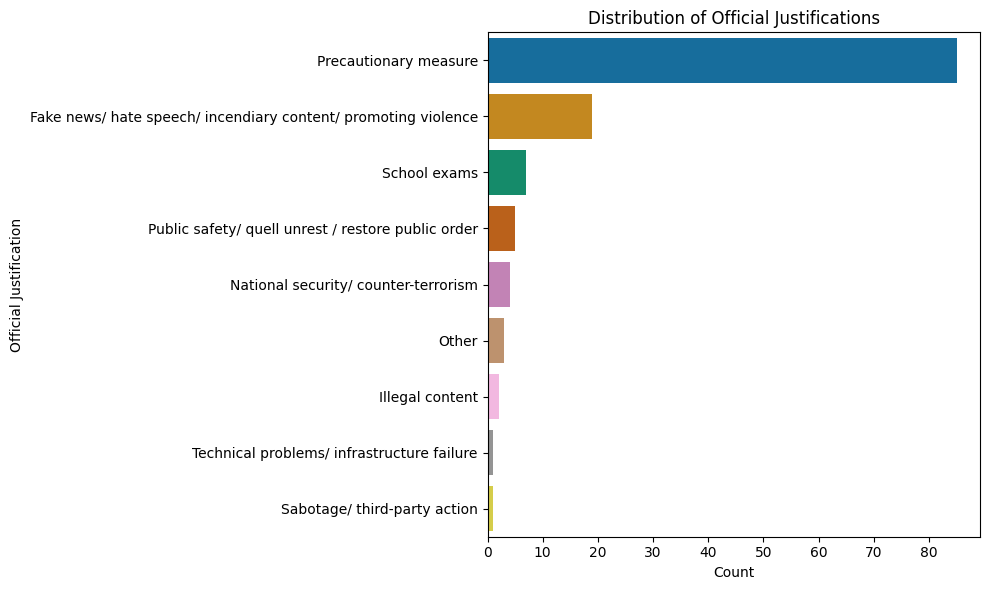

In [32]:
official_just_counts = df['official_just'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
barplot = sns.barplot(x=official_just_counts.values, y=official_just_counts.index)
plt.xlabel('Count')
plt.ylabel('Official Justification')
plt.title('Distribution of Official Justifications')
barplot.set_yticklabels([label.capitalize() for label in official_just_counts.index])

plt.tight_layout()
plt.savefig('official_just.png')
plt.show()

## Correlation Matrix of Shutdowns

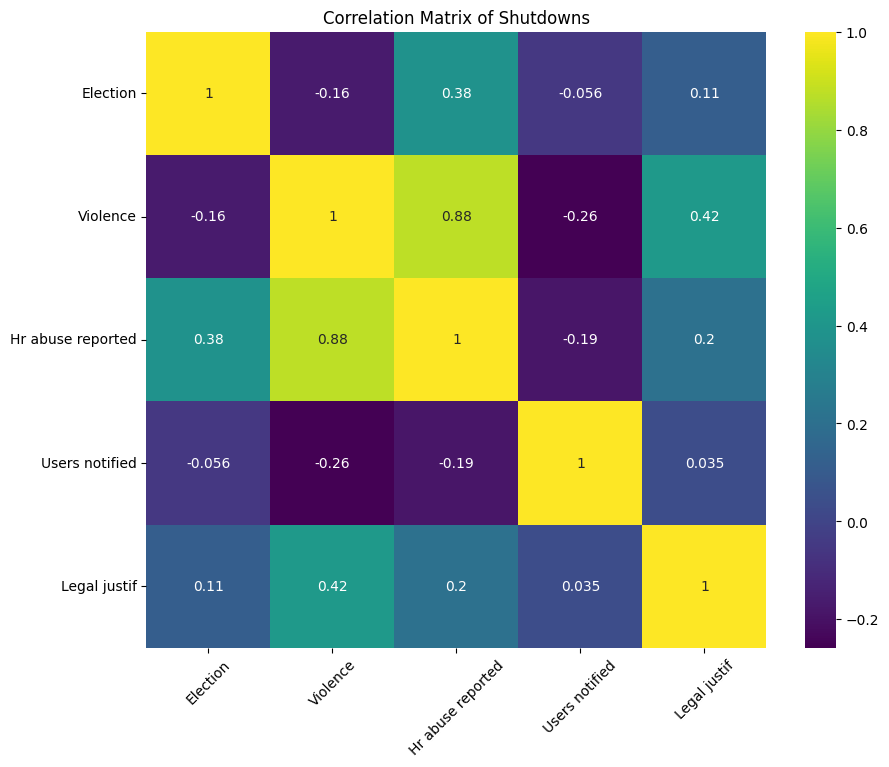

In [33]:
elec_viol_matrix = df[['election', 'violence', 'hr_abuse_reported', 'users_notified', 
                   'legal_justif']].corr()
column_names = [' '.join(col.split('_')).capitalize() for col in elec_viol_matrix.columns]

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(elec_viol_matrix, annot=True, cmap='viridis')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Matrix of Shutdowns')

plt.savefig('corr_shutdowns.png')
plt.show()

## Distribution of effects of Shutdowns

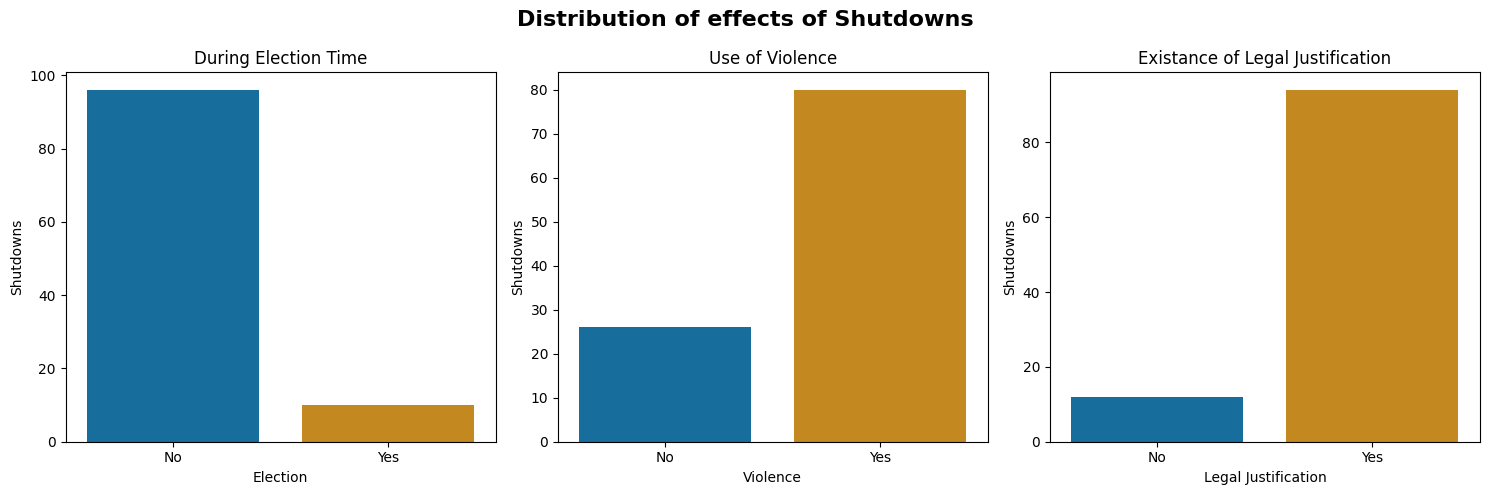

In [34]:
df_cleaned = df.dropna(subset=['election', 'violence', 'legal_justif'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_palette('colorblind')

sns.countplot(x='election', data=df_cleaned, ax=axes[0])
axes[0].set_title('During Election Time')
axes[0].set_xlabel('Election')
axes[0].set_ylabel('Shutdowns')
axes[0].set_xticklabels(['No', 'Yes'])


sns.countplot(x='violence', data=df_cleaned, ax=axes[1])
axes[1].set_title('Use of Violence')
axes[1].set_xlabel('Violence')
axes[1].set_ylabel('Shutdowns')
axes[1].set_xticklabels(['No', 'Yes'])


sns.countplot(x='legal_justif', data=df_cleaned, ax=axes[2])
axes[2].set_title('Existance of Legal Justification')
axes[2].set_xlabel('Legal Justification')
axes[2].set_ylabel('Shutdowns')
axes[2].set_xticklabels(['No', 'Yes'])

plt.suptitle('Distribution of effects of Shutdowns', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('distribution_efects.png')
plt.show()

# <span style='color:red'>Tasks</span>

- Task 1: In bullet sentences tell some differences of shutdown cases between India and Belarus. (Consider: Who ordered the shutdowns? What are the unique traits of these shutdowns? What communities are impacted? How are they impacted?)
<br><br>
- Task 2: There is a tweet report that a mobile network shutdown is ongoing in Niger right after its 2021 residential election. How would you proceed to verify this claim? (Please list any kind of evidence you think would be key to verify this shutdown and a plan to get them.)

## Intial Code

In [35]:
df_india = df[df['country'] == 'india']
df_belarus = df[df['country'] == 'belarus']

# comparison pie chart
def comparison_pie(col_ind, col_bel, title):
    create_png_title = lambda title: title.replace(' ', '_').lower()
    png_title = create_png_title(title)
    df1 = df_india[col_ind].value_counts()
    df2 = df_belarus[col_bel].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.set_palette("colorblind")

    axes[0].pie(df1, labels=[str(label).capitalize() for label in df1.index], autopct='%1.1f%%', startangle=40)
    axes[0].set_title(f'{title} in India')

    axes[1].pie(df2, labels=[str(label).capitalize() for label in df2.index], autopct='%1.1f%%', startangle=40)
    axes[1].set_title(f'{title} in Belarus')

    plt.tight_layout()
    plt.savefig(f'{png_title}_IndiaBelarus.png')
    plt.show()

# comparison bar chart
def comparison_bar(col_ind, col_bel, title):
    create_png_title = lambda title: title.replace(' ', '_').lower()
    png_title = create_png_title(title)
    df1 = df_india[col_ind]
    df2 = df_belarus[col_bel]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.set_palette("colorblind")

    df1_counts = df1.apply(lambda x: x.dropna().value_counts()).T
    df1_counts.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'{title} in India')
    axes[0].set_xlabel(f'{title}')
    axes[0].set_ylabel('Shutdowns')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_xticklabels([label.replace('_',' ').capitalize() for label in df1_counts.index])
    axes[0].legend(labels=['No', 'Yes'], loc='lower left')

    df2_counts = df2.apply(lambda x: x.dropna().value_counts()).T
    df2_counts.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title(f'{title} in Belarus')
    axes[1].set_xlabel(f'{title}')
    axes[1].set_ylabel('Shutdowns')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_xticklabels([label.replace('_', ' ').capitalize() for label in df2_counts.index])
    axes[1].legend(labels=['No', 'Yes'], loc='lower left')

    plt.tight_layout()
    plt.savefig(f'{png_title}_IndiaBelarus.png')
    plt.show()

# written comparison and save
def count_columns(df1, df2, name_df1, name_df2):
    for c in df1.columns:
        print(f"\033[1m{c.capitalize().replace('_', ' ')}\033[0m")
        print(name_df1)
        # calculate
        if c != 'duration':
            df1_counts = df1[c].astype(str).replace({'1': 'Yes', '0': 'No','<NA>': 'unknown'}).dropna().value_counts()
        else:
            df1_counts = df1[c].value_counts()
        # display
        if not df1_counts.empty:
            print(df1_counts.to_string())
        else:
            print("No data available")
            
        print(f"\n{name_df2}")
        # calculate
        if c != 'duration':
            df2_counts = df2[c].astype(str).replace({'1': 'Yes', '0': 'No', '<NA>': 'unknown'}).dropna().value_counts()
        else:
            df2_counts = df2[c].value_counts()
        # display
        if not df2_counts.empty:
            print(df2_counts.to_string())
        else:
            print("No data available")
        print("\n")

## <span style='color:red'>Task 1</span>

### Analysis Result:

<span style='color:red'> Task 1: </span>In bullet sentences tell some differences of shutdown cases between India and Belarus. (Consider: Who ordered the shutdowns? What are the unique traits of these shutdowns? What communities are impacted? How are they impacted?)

__Who ordered the shutdowns?__


India: 
- The Local Government ordered 103, State Government 3, Military 1 and the remaining 2 are unknown.<br>

Belarus: 
- The two cases were ordered by the Executive Government.

__What are the unique traits of these shutdowns?__

India:<br>
* Most cases were violent (80 of 109); <br>
* Mainly the mobile network was shut down, telecommunication services and social media were still online; <br>
* India has significantly more cases than any other country including Belarus;<br>
* India's longest duration case lasted 175 days, but the average duration is 3 days;<br>
* The majority of the cases that had a legal justification, being ‘precautionary measure’, mostly induced by political instability as the actual cause.<br>
<br>

Belarus:<br>
* Although India has 109 shutdown cases while Belarus only 2, this country had the most harsh one, taking into account that all communications were shut down with all social media being disrupted as well as the full network; this shutdown episode also took place in the whole country (level 3 of scope), while in India none of the shutdowns were on a national scale; none of the were ever notified;<br>
* Human Rights were infringed and it became a violent shutdown that lasted 120 days;<br>
* It was ordered by the Executive Government during an election period.

__What communities are impacted? How are they impacted?__

<br>
India:

- The region most affected was the Jammu and Kashmir union territory (83 of the cases from the 109) mostly in 2020 with almost all of them being ordered by the Local Government;
- Most of them lasted one day only, but this region also had India's longest lasting case of 175 days; 
- Almost all had violent episodes, having their actual cause being political instability, mainly targeting mobile networks.


Belarus:
- This country suffered 2 shutdowns, one lasting less than a day and the other being the most violent and long, lasting 120 days;
- Focusing on the most relevant shutdown: the whole country was affected, the shutdown was on a national level, with all social media being shut down; violence was experienced apart from the Human Rights infringements suffered.

 __Complementing points:__

- India has significantly more shutdown cases than Belarus, India having 109 (70.3%) and Belarus with only 2 (1.3%).
<br><br>
- India's most affected state is Jammu and Kashmir, which actually is a union territory subject of dispute between other countries. The attacks also affect mostly level 1 regions (only affecting one city, county, or village).
<br><br>
- Although India's average duration of each case is 3 days, that only happens due to its high number of occurrences.
<br><br>
- Most Indian cases turned violent, it is unknown for most cases if Human Rights infringed, nevertheless we can see that users were not notified about the shutdowns.
<br><br>
- The majority of the shutdowns that occurred in India had a legal method and a legal justification, mostly induced by political instability as the actual cause.
<br><br>
- The Indian shutdowns were also nearly all reinforced by the security operations, and referred and ordered by the local government as a precaution measure, and most were violent.
<br><br>
- Both Belarus and India had one case that lasted more than 4 months, all the other countries accounted for 15 days or less.
<br><br>
- The only points in common of these two countries' highest duration cases that we know of are that both had political reasons and were classified mainly as Full network Shutdowns.
<br><br>
- One notable difference between India and Belarus is that when an election driven shutdown occurs in India it is not violent and tends to not last a long time, the aim is mainly to control the spread of misinformation.
<br><br>
- While the cases in Belarus were very broad, meaning that they were classified as shutdowns plus took down broadband and mobile connect besides affecting full networks and services; the ones in India were also mainly classified as shutdowns, but the difference is that they affected mostly only mobile networks.
<br><br>
- The main information source for Belarus was through news media articles, meanwhile for India that only was true for almost half the cases.
<br><br>
- The case with the highest duration in Belarus did, it was ordered by the government with legal justification during an election period and experienced violence, lasted about 4 months and was justified as a National Security matter.

### Visualization:

In [36]:
# total shutdowns
total_shut = df.shape[0]
other_c = total_shut - df_belarus.shape[0] - df_india.shape[0]

# average duration of shutdowns
dur_avg_ind = df_india['duration'].mean().round(0)
dur_avg_bel = df_belarus['duration'].mean().round(0)

# top duration shutdowns
top_dur_ind = df_india['duration'].nlargest().values
top_dur_bel = df_belarus['duration'].nlargest().values

#display
print(f"""
\033[1mNumber of shutdowns\033[0m
Total: {total_shut}
India: {df_india.shape[0]}
Belarus: {df_belarus.shape[0]}
Others: {other_c}\n

\033[1mAverage duration of shutdowns\033[0m
India: {dur_avg_ind}
Belarus: {dur_avg_bel}\n

\033[1mTop duration of shutdowns\033[0m
India: {top_dur_ind.tolist()}
Belarus: {top_dur_bel.tolist()}
""")


Number of shutdowns
Total: 155
India: 109
Belarus: 2
Others: 44


Average duration of shutdowns
India: 3.0
Belarus: 60.0


Top duration of shutdowns
India: [175, 15, 14, 11, 9]
Belarus: [120, 0]



In [37]:
# compare cases
gov_cols = ["ordered_by", "duration", "state/india", "actual_cause", "official_just", "legal_justif", 
            "violence", "election", "affected_network", "gov_ack", "hr_abuse_reported"]
gov_ind = df_india[gov_cols]
gov_bel = df_belarus[gov_cols]

count_columns(gov_ind, gov_bel, 'India:', 'Belarus:')

Ordered by
India:
local government    103
state government      3
unknown               2
military              1

Belarus:
executive government    2


Duration
India:
1      44
0      40
2       7
4       2
5       2
3       2
175     1
9       1
7       1
15      1
14      1
11      1

Belarus:
0      1
120    1


State/india
India:
jammu and kashmir    83
unknown              13
west bengal           3
rajasthan             3
maharashtra           1
andhra pradesh        1
madhya pradesh        1
uttar pradesh         1
meghalaya             1
manipur               1
arunachal pradesh     1

Belarus:
unknown    2


Actual cause
India:
political instability            75
elections                        10
protests                          8
religious holiday/anniversary     5
other                             5
communal violence                 4
exam cheating                     2

Belarus:
other        1
elections    1


Official just
India:
precautionary measure                  

In [38]:
# compare cases
gov_cols = ["ordered_by", "official_just", "legal_justif", "violence","election", "gov_ack", "duration"]
gov_ind = df_india[gov_cols]
gov_bel = df_belarus[gov_cols]

count_columns(gov_ind, gov_bel, 'India:', 'Belarus:')

Ordered by
India:
local government    103
state government      3
unknown               2
military              1

Belarus:
executive government    2


Official just
India:
precautionary measure                                             85
fake news/ hate speech/ incendiary content/ promoting violence    14
public safety/ quell unrest / restore public order                 5
unknown                                                            2
school exams                                                       2
national security/ counter-terrorism                               1

Belarus:
unknown                                 1
national security/ counter-terrorism    1


Legal justif
India:
Yes        95
unknown    13
No          1

Belarus:
unknown    2


Violence
India:
Yes        80
No         22
unknown     7

Belarus:
No     1
Yes    1


Election
India:
No     99
Yes    10

Belarus:
No     1
Yes    1


Gov ack
India:
Yes        107
unknown      2

Belarus:
No         1
unknown 

In [39]:
# logest duration comparison
top1_dur_compare = df.loc[[df_india['duration'].idxmax(), df_belarus['duration'].idxmax()], 
                         ['country', 'duration', 'geo_scope', 'ordered_by', 'shutdown_type_new', 'affected_network',
                         'full_or_service-based', 'facebook_affected', 'twitter_affected', 'whatsapp_affected',
                         'instagram_affected', 'telegram_affected', 'sms_affected', 'phone_call_affected',
                         'gov_ack', 'official_just', 'actual_cause', 'election', 'violence', 'hr_abuse_reported',
                         'users_notified', 'legal_justif']].T

top1_dur_compare.columns = top1_dur_compare.iloc[0].str.upper()
top1_dur_compare = top1_dur_compare[1:]
top1_dur_compare = top1_dur_compare.fillna('unknown')
      
top1_dur_compare

country,INDIA,BELARUS
duration,175,120
geo_scope,level 2,level 3
ordered_by,state government,executive government
shutdown_type_new,shutdown,"shutdown, throttle"
affected_network,"broadband, mobile","broadband, mobile"
full_or_service-based,full network,"full network, service-based"
facebook_affected,0,1
twitter_affected,0,1
whatsapp_affected,0,1
instagram_affected,0,1


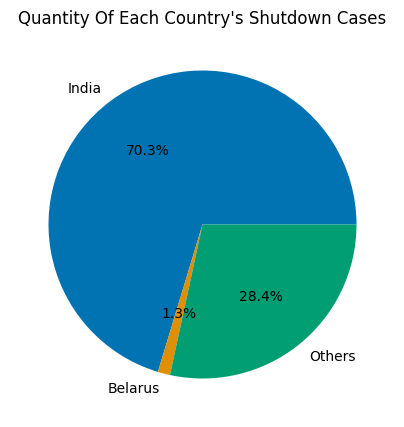

In [40]:
# quantity of shutdowns
data = [df_india.shape[0], df_belarus.shape[0], other_c]
lbl = ['India', 'Belarus', 'Others']

plt.figure(figsize=(5, 5))
sns.set_palette("colorblind")
plt.title("Quantity Of Each Country's Shutdown Cases")
colors = sns.color_palette('flare', len(data))
plt.pie(data, labels=lbl, autopct='%1.1f%%')

plt.savefig('quantity_shutdowns_IndiaBelarus.png')
plt.show()

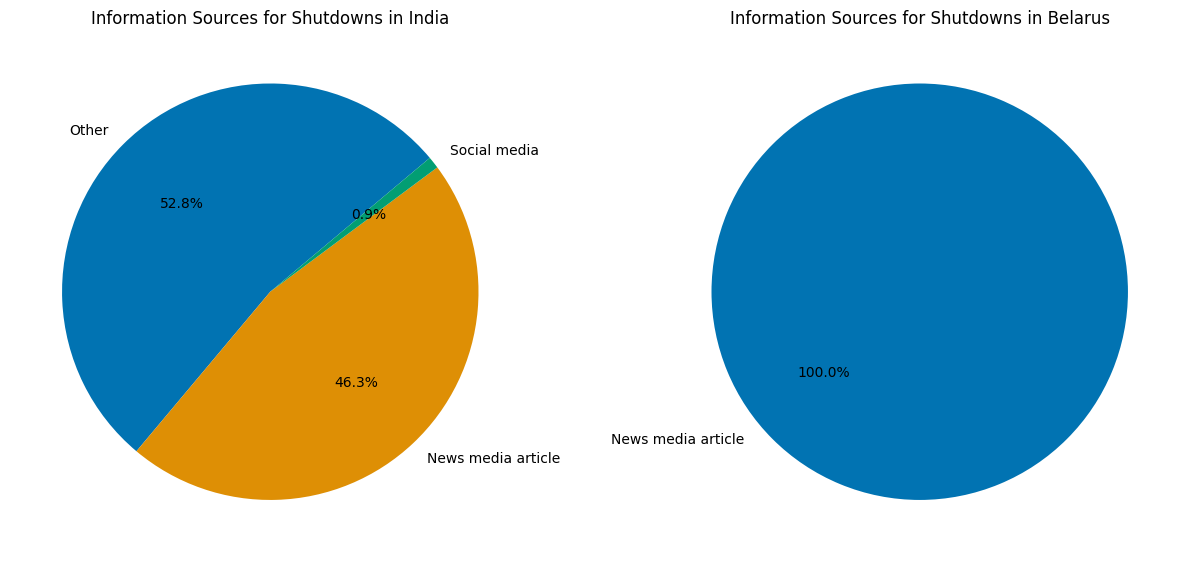

In [41]:
# info source comparison
comparison_pie('info_source', 'info_source', 'Information Sources for Shutdowns')

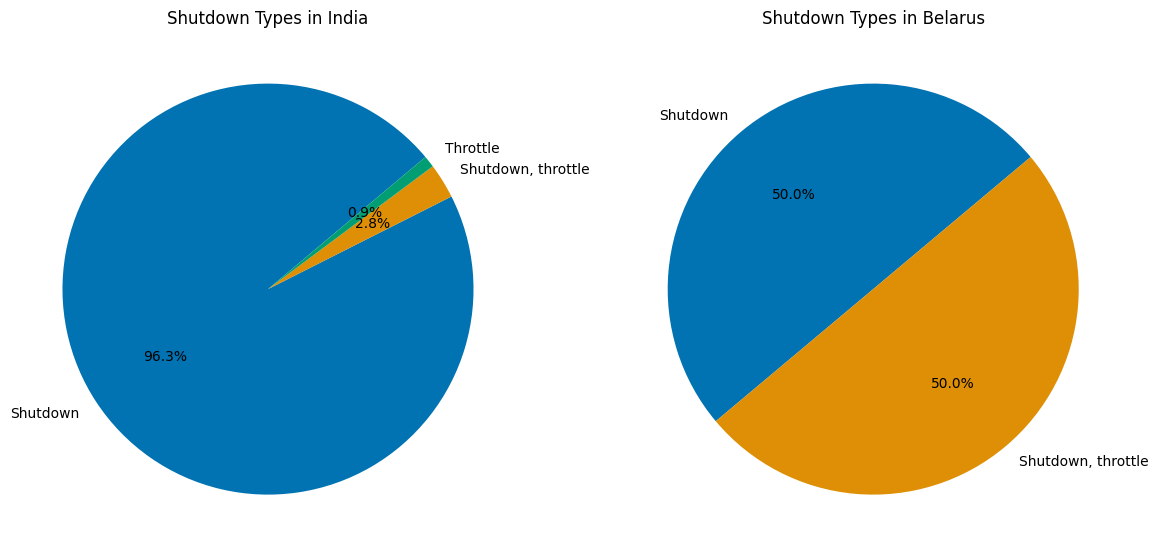

In [42]:
# shutdown types comparison
comparison_pie('shutdown_type_new', 'shutdown_type_new', 'Shutdown Types')

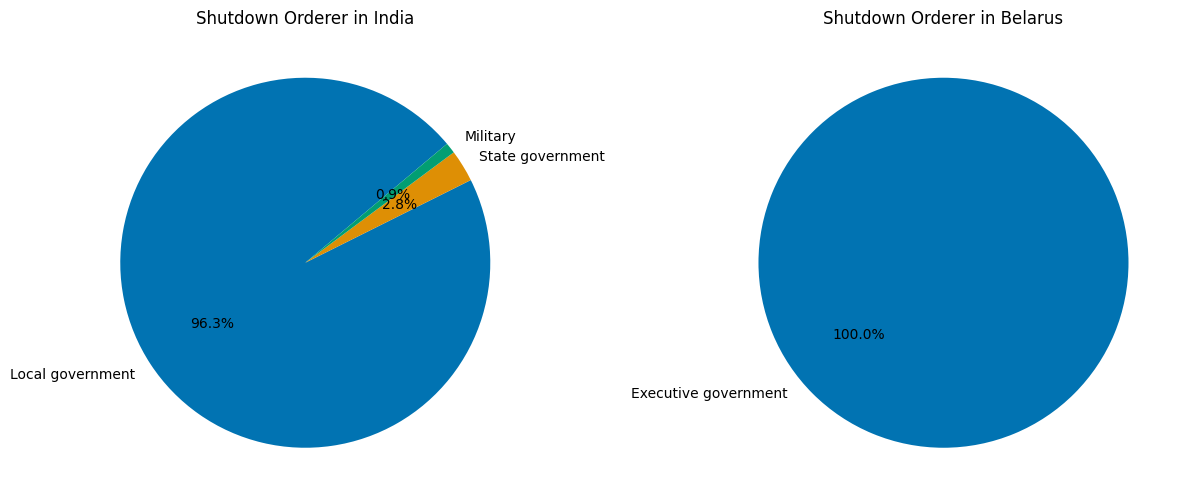

In [43]:
# ordered by comparison
comparison_pie('ordered_by', 'ordered_by', 'Shutdown Orderer')

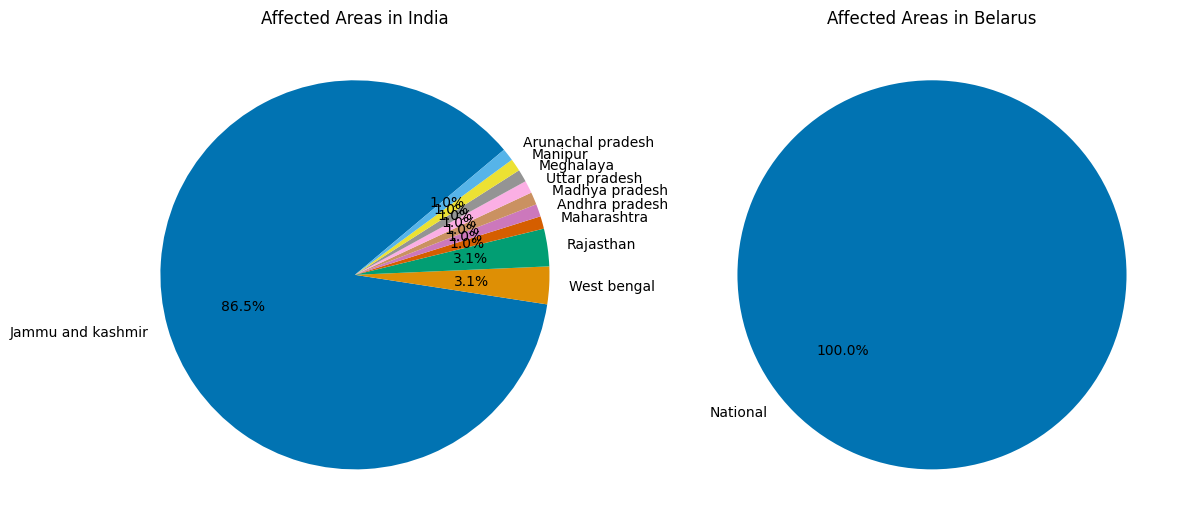

In [44]:
# shutdown area comparison
comparison_pie('state/india', 'area_name', 'Affected Areas')

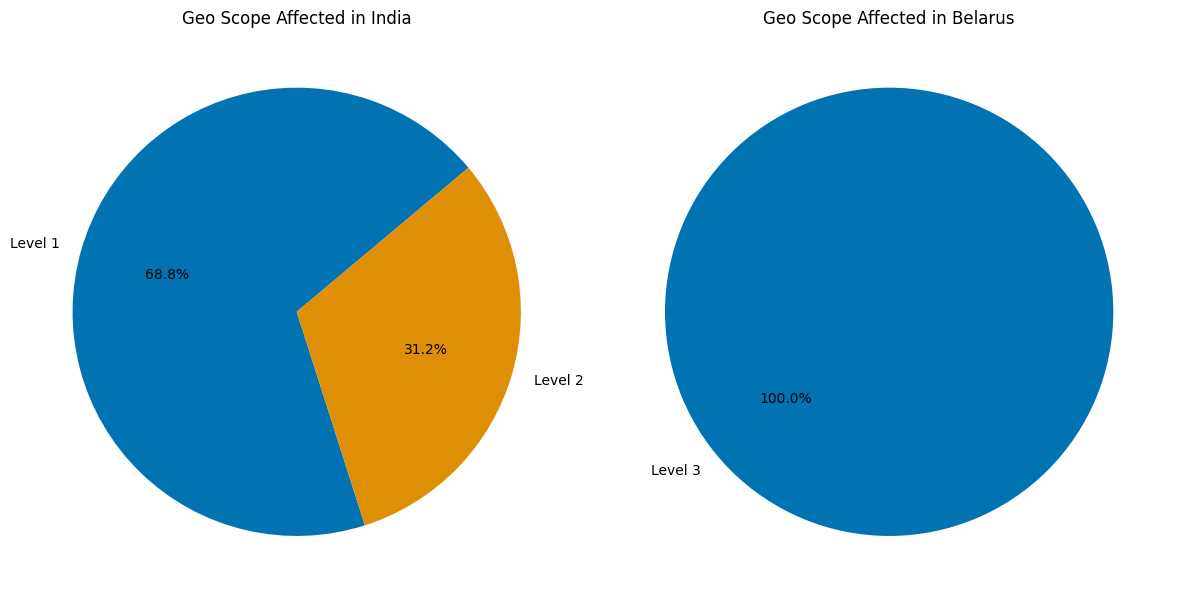

In [45]:
# geo scope comparison
comparison_pie('geo_scope', 'geo_scope', 'Geo Scope Affected')

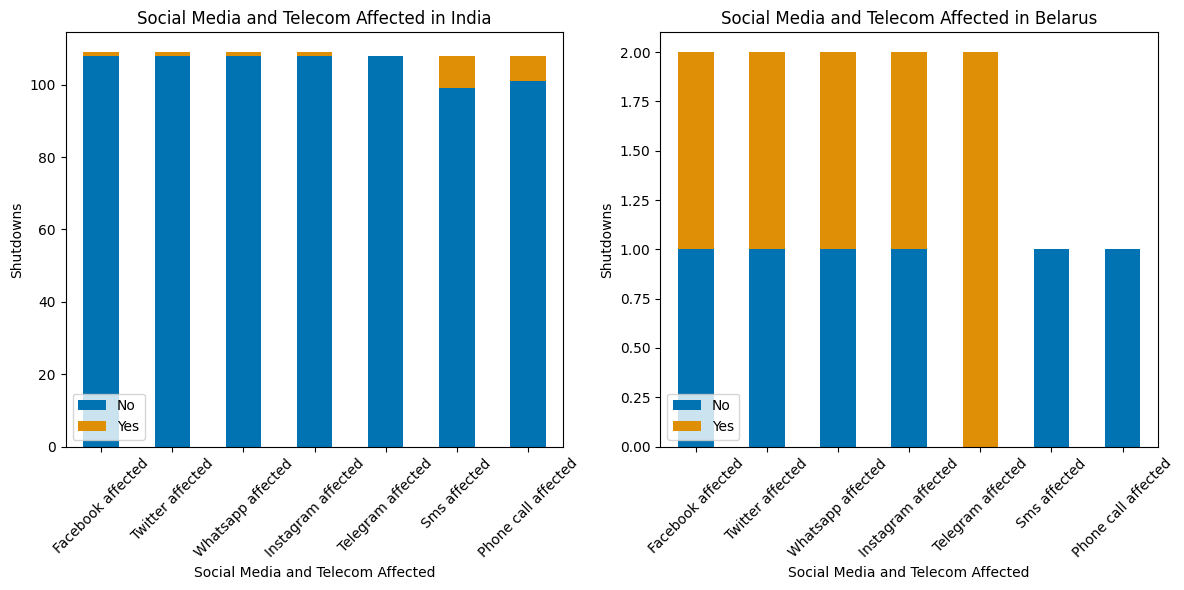

In [46]:
# social media and telecom comparison
cols = ["facebook_affected", "twitter_affected", "whatsapp_affected", "instagram_affected", "telegram_affected", "sms_affected", "phone_call_affected"]
comparison_bar(cols, cols, "Social Media and Telecom Affected")

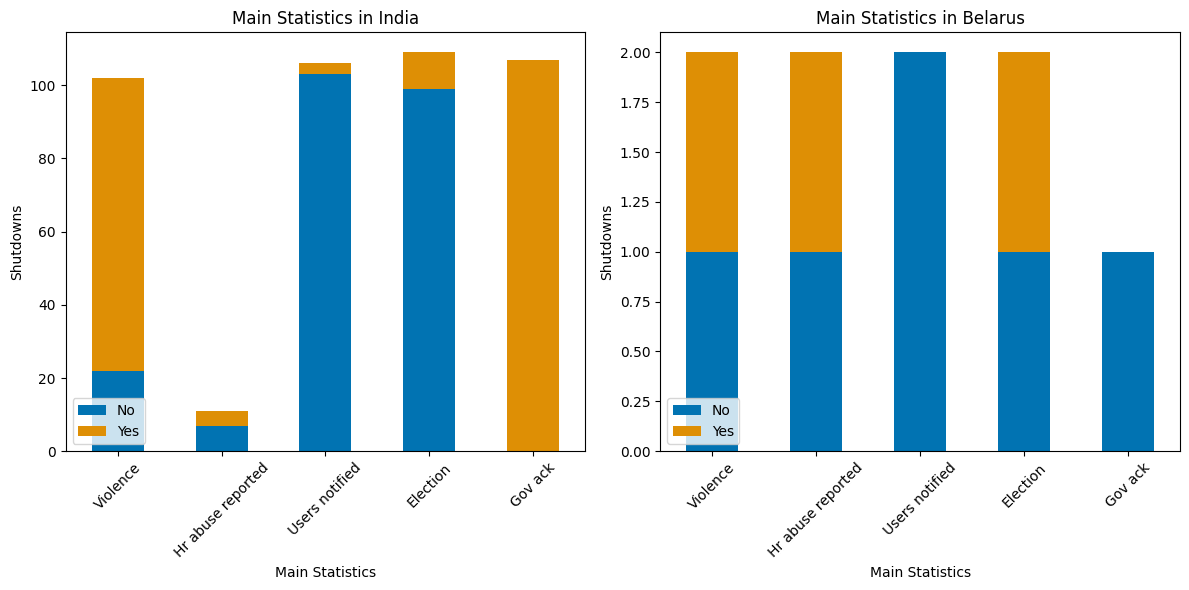

In [47]:
# mais stats comparison 
cols = ["violence", "hr_abuse_reported", "users_notified", "election" ,"gov_ack"]
comparison_bar(cols, cols, "Main Statistics")

## <span style='color:red'>Task 2</span>

<span style='color:red'> Task 2: </span>There is a tweet report that a mobile network shutdown is ongoing in Niger right after its 2021 residential election. How would you proceed to verify this claim? (Please list any kind of evidence you think would be key to verify this shutdown and a plan to get them.)

First, I would check if I already have sources on the ground or that have access to them that my organization already trusts and that where already verified as a reliable source.<br>
I would also verify the twitter account:
 - Is it a new or old one?
 - How frequent are the posts?
 - Do the older posts have truthful information?
 - Does the account have friends, followers and is follow others?
 - Check the interactions from this account to others.
 - Get in touch with the source and verify them and if anyone else has this information.
 - Do crowdsourcing verification, the "Andy Carvin's Method", retweeting the report and asking for other users to help verify it, or even refute it.

Since the data in STOP is authentic, I can say that the biggest information source is News media articles, so I would also 
examine them for reliable confirmation to what was stated on the tweet report.<br>
There are some methodologies that can be applied to verify a source, for example 5Ws, SMART Check, CRAAP test and so on, I would apply those to the tweet report and the sources I would investigate for confirmation.<br>

I would also check in STOP if this kind of activity already happened in the country for the same or similar political reasons so it would indicate if the report is realistic or if it's a first time occurrence and requires even more inspection.<br>

I would have to research deeper to know if this option is possible: Since mobile network shutdowns restrict the access to social networks we could as an NGO get in touch with the social media companies and have them report any suspicious shutdown activity, specially if it occurs in a large area; they should be able to verify if their service was affected and could then report back to our organization, or give us the path to find this information in case they have a transparency page, for our further investigation and tracking.


In [48]:
df.groupby(['info_source']).size()

info_source
confidential           1
cso kio partners       7
news media article    85
other                 57
social media           4
dtype: int64